In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PRÁCTICA 2**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set_style("darkgrid")

In [18]:
df_air = pd.read_csv("/content/drive/MyDrive/csv/airline-passengers.csv")
df_traffic = pd.read_csv("/content/drive/MyDrive/csv/traffic_accidents.csv")
df_temp = pd.read_csv("/content/drive/MyDrive/csv/daily-min-temperatures.csv")

print(df_air.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [19]:
print( df_traffic.head())

               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL           

In [20]:
print(df_temp.head())

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


<ipython-input-28-92294d2226c1>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_traffic['crash_date'] = pd.to_datetime(df_traffic['crash_date'])


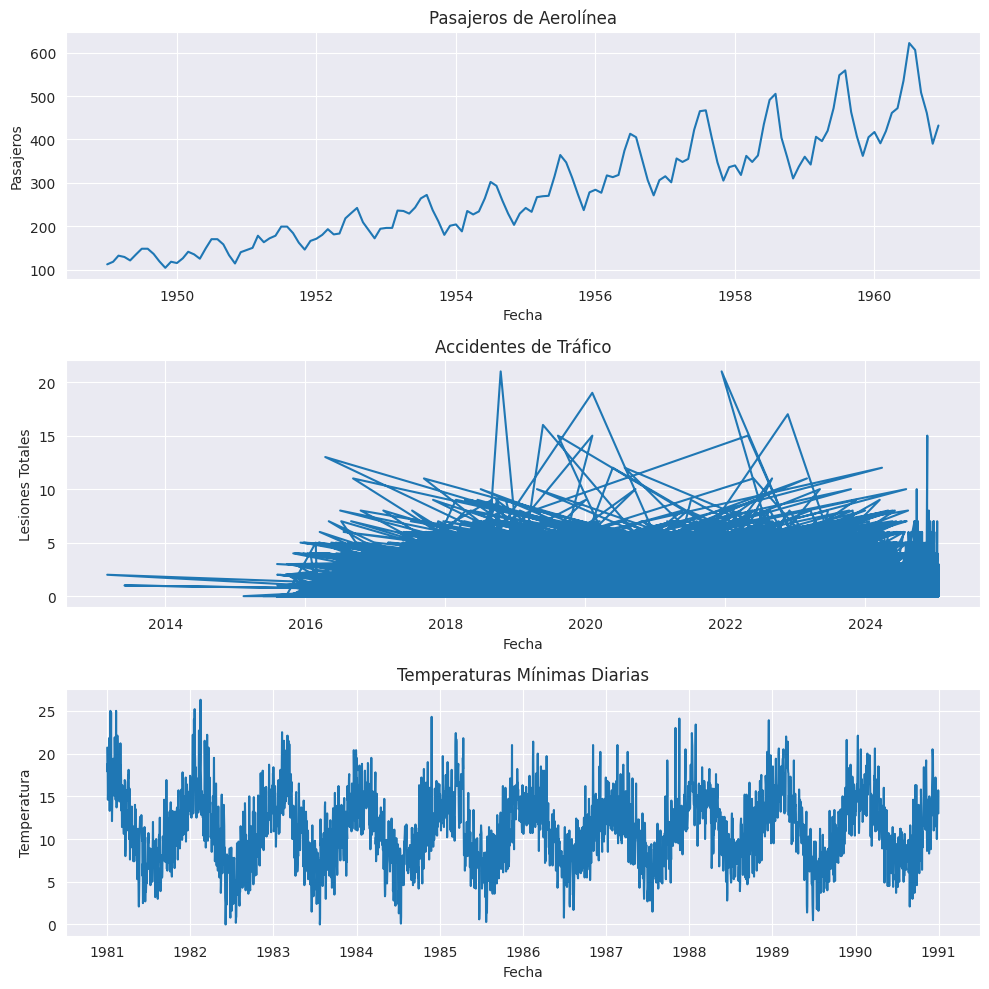

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV
df_air = pd.read_csv("/content/drive/MyDrive/csv/airline-passengers.csv")
df_traffic = pd.read_csv("/content/drive/MyDrive/csv/traffic_accidents.csv")
df_temp = pd.read_csv("/content/drive/MyDrive/csv/daily-min-temperatures.csv")

# Convertir la columna de fecha a datetime si es necesario
df_air['Month'] = pd.to_datetime(df_air['Month'])
df_traffic['crash_date'] = pd.to_datetime(df_traffic['crash_date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Crear los gráficos de serie de tiempo
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Gráfico para df_air
axes[0].plot(df_air['Month'], df_air['Passengers'])
axes[0].set_title('Pasajeros de Aerolínea')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Pasajeros')

# Gráfico para df_traffic
axes[1].plot(df_traffic['crash_date'], df_traffic['injuries_total'])
axes[1].set_title('Accidentes de Tráfico')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Lesiones Totales')

# Gráfico para df_temp
axes[2].plot(df_temp['Date'], df_temp['Temp'])
axes[2].set_title('Temperaturas Mínimas Diarias')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Temperatura')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [22]:
#separar la columna 'crash_date' en 'date' y 'time'
df_traffic[['date', 'time']] = df_traffic['crash_date'].str.split(' ', n=1, expand=True)

# Separar la columna 'crash_date' en 'date' y 'time'
df_traffic[['date', 'time']] = df_traffic['crash_date'].str.split(' ', n=1, expand=True)

# Eliminar la columna de hora y la original
df_traffic = df_traffic.drop(columns=['crash_date', 'time'])

# Mantener solo las columnas necesarias
df_traffic = df_traffic[['date', 'injuries_total']]

# Guardar el dataset modificado
df_traffic.to_csv("traffic_accidents_processed.csv", index=False)

In [25]:
# Separar la columna 'crash_date' en 'date' y 'time'
df_traffic[['date', 'time']] = df_traffic['crash_date'].str.split(' ', n=1, expand=True)

df_traffic['date'] = pd.to_datetime(df_traffic['date'])

industrial_prod = df_traffic.set_index('date')['injuries_total']

<ipython-input-29-21fb224417c2>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_traffic['date'] = pd.to_datetime(df_traffic['crash_date']).dt.date # Extract date only


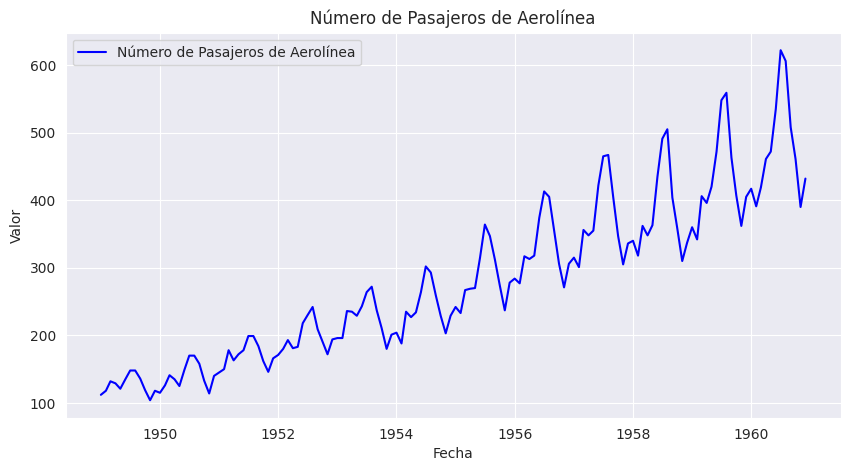

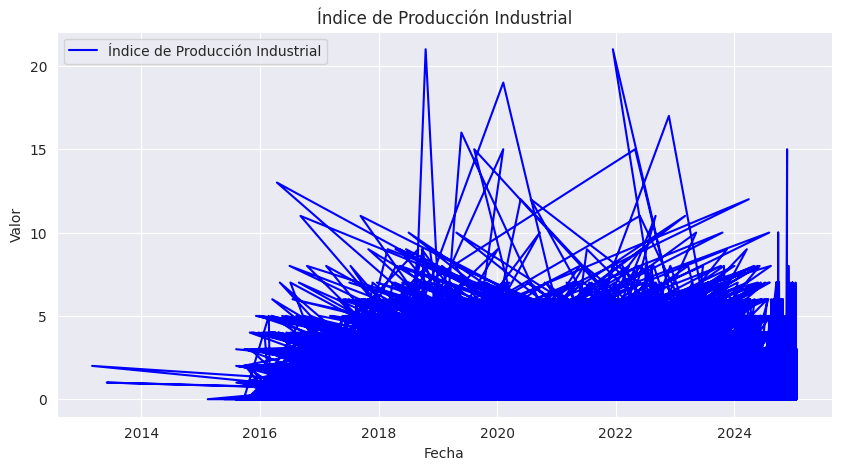

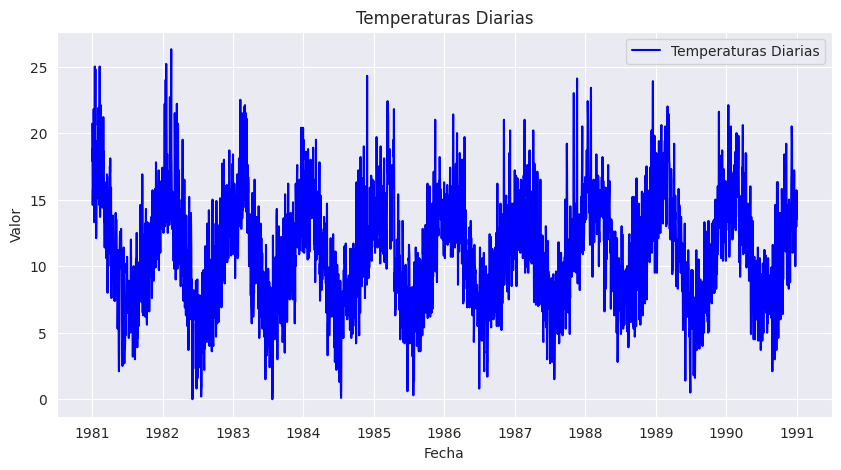

Resultados de la prueba Dickey-Fuller para Número de Pasajeros de Aerolínea
Estadístico de prueba: 0.8153688792060498
p-valor: 0.991880243437641
# Lags Usados: 13
# Observaciones: 130
Valor crítico (1%): -3.4816817173418295
Valor crítico (5%): -2.8840418343195267
Valor crítico (10%): -2.578770059171598
Conclusión: La serie no es estacionaria
--------------------------------------------------
Resultados de la prueba Dickey-Fuller para Índice de Producción Industrial
Estadístico de prueba: -262.3956169977392
p-valor: 0.0
# Lags Usados: 2
# Observaciones: 209303
Valor crítico (1%): -3.4303812436047325
Valor crítico (5%): -2.861553809263269
Valor crítico (10%): -2.5667773501737705
Conclusión: La serie es estacionaria
--------------------------------------------------
Resultados de la prueba Dickey-Fuller para Temperaturas Diarias
Estadístico de prueba: -4.4448049246117
p-valor: 0.0002470826300360994
# Lags Usados: 20
# Observaciones: 3629
Valor crítico (1%): -3.4321532327220154
Valor críti

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set_style("darkgrid")

# Cargando los datasets
df_air = pd.read_csv("/content/drive/MyDrive/csv/airline-passengers.csv")
df_traffic = pd.read_csv("/content/drive/MyDrive/csv/traffic_accidents.csv")
df_temp = pd.read_csv("/content/drive/MyDrive/csv/daily-min-temperatures.csv")

#Definimos las variables de tiempo
df_air['Month'] = pd.to_datetime(df_air['Month'])
air_passengers = df_air.set_index('Month')['Passengers']

df_traffic['date'] = pd.to_datetime(df_traffic['crash_date']).dt.date # Extraer solo la fecha
industrial_prod = df_traffic.set_index('date')['injuries_total']

#La fecha la nombramos a df_temp
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
temperature = df_temp.set_index('Date')['Temp']


def plot_series(df, title):
    plt.figure(figsize=(10, 5))
    plt.plot(df, label=title, color='blue')
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.show()

def adf_test(series, title):
    print(f"Resultados de la prueba Dickey-Fuller para {title}")
    result = adfuller(series.dropna())
    labels = ['Estadístico de prueba', 'p-valor', '# Lags Usados', '# Observaciones']
    for label, value in zip(labels, result[:4]):
        print(f"{label}: {value}")
    for key, value in result[4].items():
        print(f"Valor crítico ({key}): {value}")
    print("Conclusión: La serie es estacionaria" if result[1] < 0.05 else "Conclusión: La serie no es estacionaria")
    print("-" * 50)

# Grafico de series de tiempo
plot_series(air_passengers, "Número de Pasajeros de Aerolínea")
plot_series(industrial_prod, "Índice de Producción Industrial")
plot_series(temperature, "Temperaturas Diarias")

# Prueba Dickey-Fuller
adf_test(air_passengers, "Número de Pasajeros de Aerolínea") # Calling the correct function name
adf_test(industrial_prod, "Índice de Producción Industrial")
adf_test(temperature, "Temperaturas Diarias")